In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings

In [37]:
df=pd.read_csv(r'C:\Users\91833\end to end projects\diabetes prediction\data\raw\heart disease.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [38]:
df = df.rename(columns={
                'age':'Age',
                'gender':'Sex',
                'height':'Height',
                'weight':'Weight',
               'ap_hi': 'Systolic_BP',
               'ap_lo': 'Diastolic_BP',
               'cholesterol': 'Cholesterol_Level',
               'gluc': 'Glucose_Level',
               'smoke': 'Smoking_Status',
               'alco': 'Alcohol_Intake',
               'active': 'Physical_Activity',
               'cardio': 'target'
})

In [39]:
df.head()

,id,Age,Sex,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol_Level,Glucose_Level,Smoking_Status,Alcohol_Intake,Physical_Activity,target
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Sex                70000 non-null  int64  
 3   Height             70000 non-null  int64  
 4   Weight             70000 non-null  float64
 5   Systolic_BP        70000 non-null  int64  
 6   Diastolic_BP       70000 non-null  int64  
 7   Cholesterol_Level  70000 non-null  int64  
 8   Glucose_Level      70000 non-null  int64  
 9   Smoking_Status     70000 non-null  int64  
 10  Alcohol_Intake     70000 non-null  int64  
 11  Physical_Activity  70000 non-null  int64  
 12  target             70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [41]:
df.shape

(70000, 13)

In [42]:
df.isnull().sum()

id                   0
Age                  0
Sex                  0
Height               0
Weight               0
Systolic_BP          0
Diastolic_BP         0
Cholesterol_Level    0
Glucose_Level        0
Smoking_Status       0
Alcohol_Intake       0
Physical_Activity    0
target               0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.describe()

,id,Age,Sex,Height,Weight,Systolic_BP,Diastolic_BP,Cholesterol_Level,Glucose_Level,Smoking_Status,Alcohol_Intake,Physical_Activity,target
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data validation and Pre-processing

In [45]:
# convert age to years
df['Age_Years']= round(df['Age']/365,0)
df.drop('Age', axis=1, inplace=True)

In [46]:
# convert height to meters
df['Height_mt'] = df['Height']/100
df.drop('Height', axis=1, inplace=True)

In [47]:
#Apply cleaning rules ---
df= df[
    (df['Systolic_BP'] >= 90) & (df['Systolic_BP'] <= 250) &   # valid systolic range
    (df['Diastolic_BP'] >= 60) & (df['Diastolic_BP'] <= 150) & # valid diastolic range
    (df['Diastolic_BP'] <= df['Systolic_BP'])                  # logical condition
]

In [48]:
df['BMI'] = df['Weight'] / (df['Height_mt'] ** 2)

In [49]:
# checking for wrong entries
df.sort_values(by='BMI', ascending=False).head(10)[['BMI', 'Age_Years','Height_mt']].reset_index(drop=True)

,BMI,Age_Years,Height_mt
0,298.666667,54.0,0.75
1,278.125000,42.0,0.80
2,267.768595,64.0,0.55
3,237.768633,52.0,0.81
4,191.666667,52.0,0.60
5,187.750077,52.0,0.57
6,180.678074,48.0,0.97
7,178.962747,54.0,0.74
8,178.213411,56.0,0.67
9,170.414201,54.0,0.65


In [50]:
# --- Define realistic ranges ---
BMI_MIN, BMI_MAX = 15, 60
HEIGHT_MIN, HEIGHT_MAX = 1.3, 2.1

# --- Store initial row count ---
initial_rows = len(df)

# --- Filter dataframe based on Height and BMI ---
df = df[
    (df['Height_mt'] >= HEIGHT_MIN) &
    (df['Height_mt'] <= HEIGHT_MAX)
].copy()

# --- Recalculate BMI after height filtering ---
df['BMI'] = df['Weight'] / (df['Height_mt'] ** 2)

# --- Filter based on BMI ---
df = df[(df['BMI'] >= BMI_MIN) & (df['BMI'] <= BMI_MAX)]

### Bssic feature engineering

In [51]:
def classify_bp(row):
    if row['Systolic_BP'] < 120 and row['Diastolic_BP'] < 80:
        return 1
    elif 120 <= row['Systolic_BP'] <= 129 and row['Diastolic_BP'] < 80:
        return 2
    elif (130 <= row['Systolic_BP'] <= 139) or (80 <= row['Diastolic_BP'] <= 89):
        return 3
    elif (140 <= row['Systolic_BP'] <= 180) or (90 <= row['Diastolic_BP'] <= 120):
        return 4
    elif row['Systolic_BP'] > 180 or row['Diastolic_BP'] > 120:
        return 5
    else:
        return 'Unknown'

df['BP_level'] = df.apply(classify_bp, axis=1)
df['BP_level'].value_counts()

BP_level
3    39693
4    16146
1     9392
2     3093
5       37
Name: count, dtype: int64

In [52]:
# Define bins and labels
age_bins = [29, 40, 50, 60, 70]  # based on descriptive stats min 30 and max 65
age_labels = ['30-40', '41-50', '51-60', '61-70']

df['Age_Group'] = pd.cut(df['Age_Years'], bins=age_bins, labels=age_labels, right=True)
print("\nAge Group counts:\n",df['Age_Group'].value_counts())


Age Group counts:
 Age_Group
51-60    34695
41-50    20444
61-70    10173
30-40     3049
Name: count, dtype: int64


In [53]:
# Class BMI Categories
bmi_bins_5 = [0, 18.5, 25, 30, 35, np.inf]
bmi_labels_5 = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins_5, labels=bmi_labels_5, right=False)

# Check counts for each category
print(df['BMI_Category'].value_counts())

BMI_Category
Normal         25337
Overweight     24566
Obese I        11925
Obese II+       5929
Underweight      604
Name: count, dtype: int64


In [54]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP',
       'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status',
       'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years',
       'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category'],
      dtype='object')

In [55]:
# Check missing % per column
missing_pct = df.isna().mean() * 100
print("Missing % per column:\n", missing_pct)

Missing % per column:
 id                   0.0
Sex                  0.0
Weight               0.0
Systolic_BP          0.0
Diastolic_BP         0.0
Cholesterol_Level    0.0
Glucose_Level        0.0
Smoking_Status       0.0
Alcohol_Intake       0.0
Physical_Activity    0.0
target               0.0
Age_Years            0.0
Height_mt            0.0
BMI                  0.0
BP_level             0.0
Age_Group            0.0
BMI_Category         0.0
dtype: float64


# EDA

In [56]:
# Heart disease prevalence
print("Heart disease prevalence:")
print(df['target'].value_counts(normalize=True) * 100)

Heart disease prevalence:
target
0    50.479074
1    49.520926
Name: proportion, dtype: float64


### univariate analysis

In [57]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP',
       'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status',
       'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years',
       'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category'],
      dtype='object')

### numerical analysis

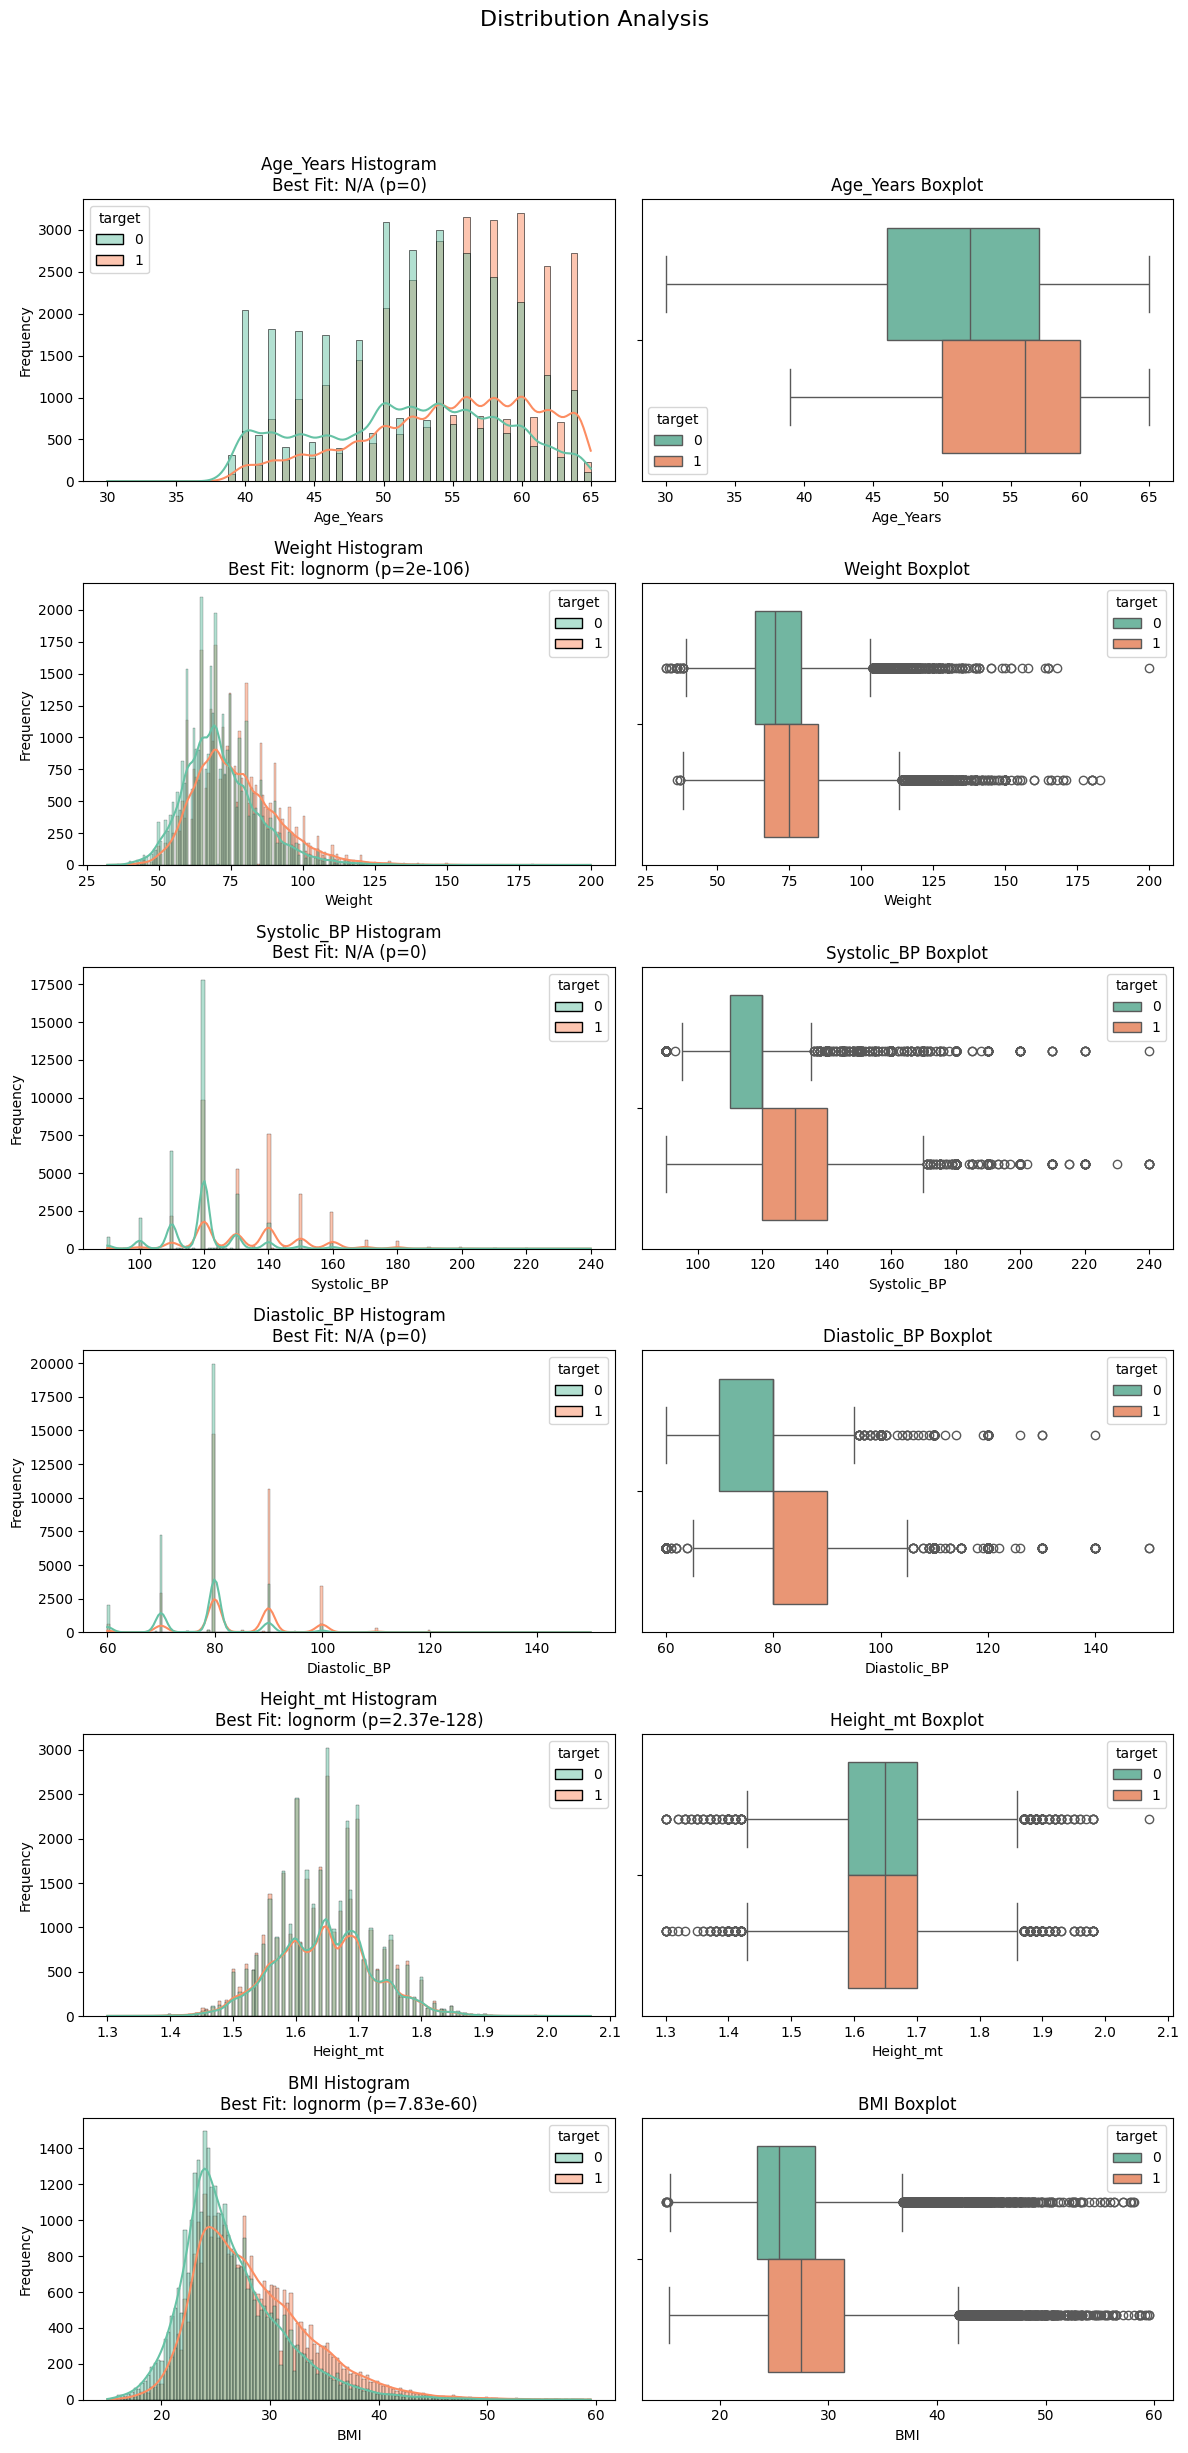

In [58]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['Age_Years', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Height_mt', 'BMI']
distributions = ['norm', 'expon', 'uniform', 'gamma', 'lognorm']

n_rows = len(numeric_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows), squeeze=False)
fig.suptitle('Distribution Analysis', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    # Prepare DataFrame with target for hue
    data_col = df[[col, 'target']].dropna()
    if len(data_col) < 10:
        continue

    # Best-fit distribution (ignoring target for fitting)
    best_fit_name, best_p_value = 'N/A', 0
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data_col[col])
            _, p_value = stats.kstest(data_col[col], dist_name, args=params)
            if p_value > best_p_value:
                best_fit_name, best_p_value = dist_name, p_value
        except ValueError:
            continue

    # Histogram + KDE
    sns.histplot(data=data_col, x=col, kde=True, ax=axes[i, 0], hue='target', palette='Set2')
    axes[i, 0].set_title(f'{col} Histogram\nBest Fit: {best_fit_name} (p={best_p_value:.3g})')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(data=data_col, x=col, y=None, ax=axes[i, 1], hue='target', palette='Set2')
    axes[i, 1].set_title(f'{col} Boxplot')
    axes[i, 1].set_xlabel(col)

plt.tight_layout(rect=(0, 0, 1, 0.98))
plt.show()

C:\Users\91833\AppData\Local\Temp\ipykernel_13452\1604544413.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('target', group_keys=False).apply(


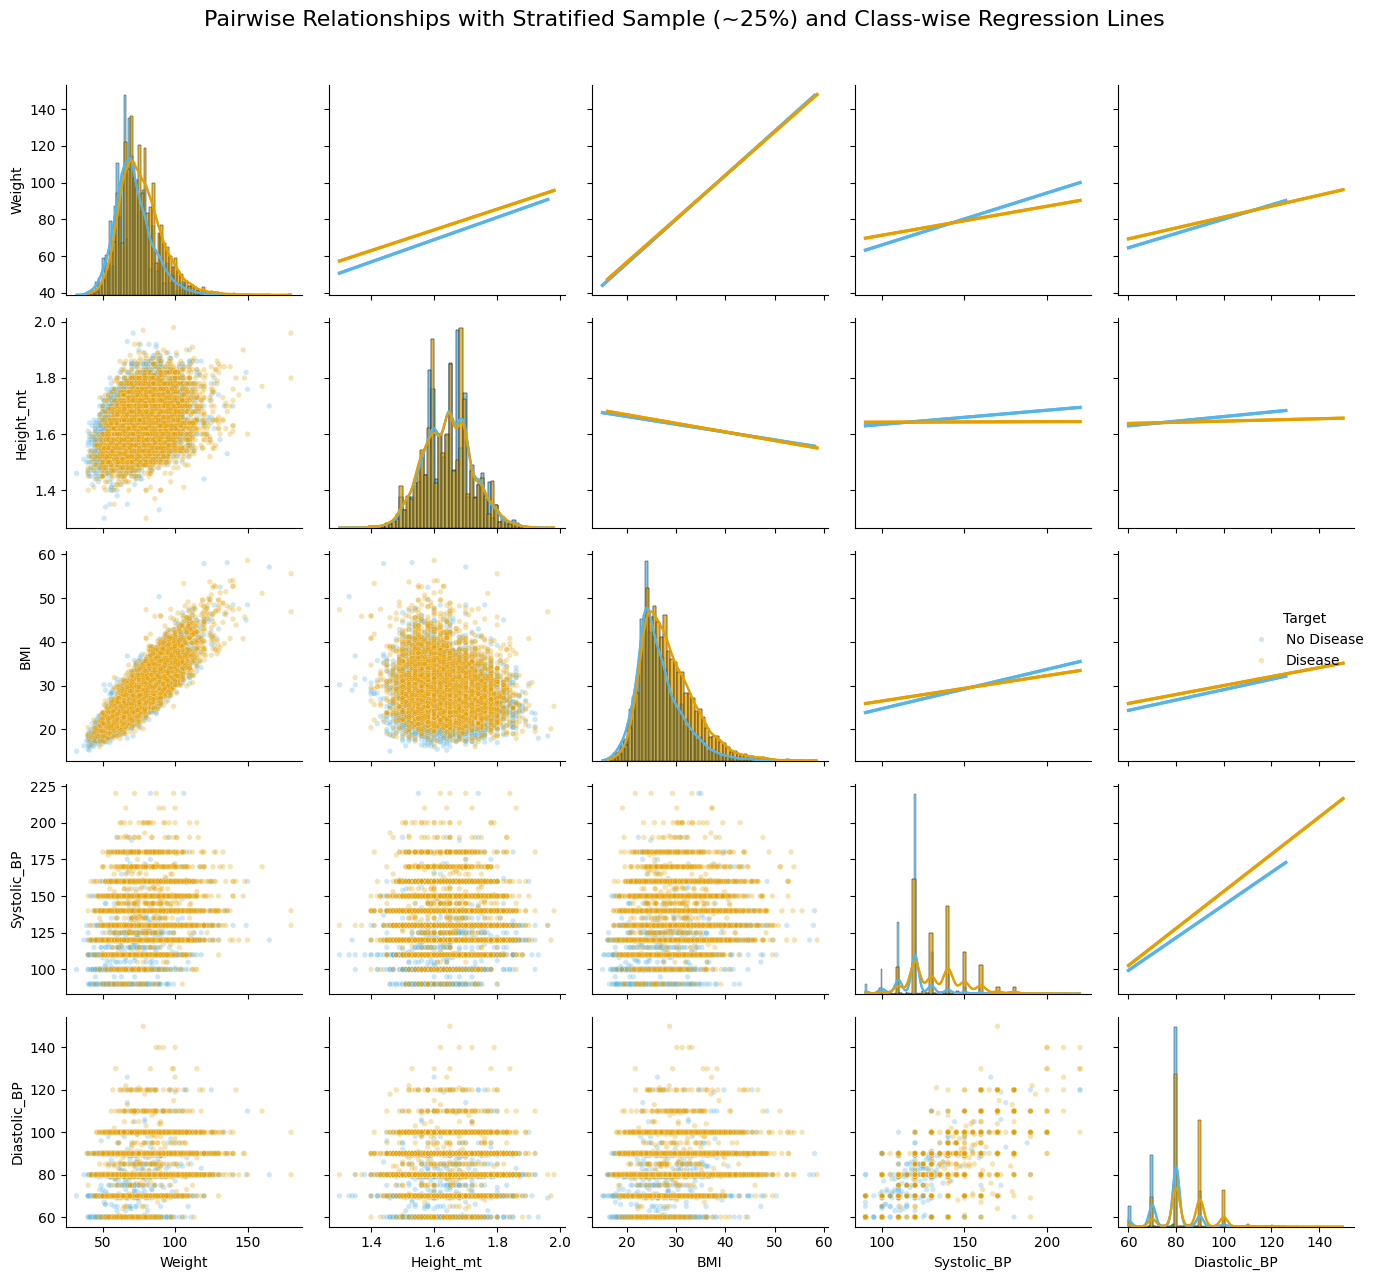

In [59]:
# -----------------------------
# 1. Numeric features & target
# -----------------------------
numeric_cols = ['Weight','Height_mt','BMI','Systolic_BP', 'Diastolic_BP']
df['target_name'] = df['target'].map({0: 'No Disease', 1: 'Disease'})

# -----------------------------
# 2. Stratified sample (~25% of data, 15k rows)
# -----------------------------
sample_size = 15000
if len(df) > sample_size:
    df_sample = df.groupby('target', group_keys=False).apply(
        lambda x: x.sample(n=int(sample_size/2), random_state=42)  # equal split per target
    ).reset_index(drop=True)
else:
    df_sample = df.copy()

# -----------------------------
# 3. Palette for light/high-contrast colors
# -----------------------------
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# -----------------------------
# 4. PairGrid
# -----------------------------
g = sns.PairGrid(df_sample, vars=numeric_cols, hue='target_name', palette=palette, diag_sharey=False)

# Upper triangle: regression lines per target
def reg_by_target(x, y, **kwargs):
    for name, color in palette.items():
        subset = df_sample[df_sample['target_name'] == name]
        sns.regplot(x=subset[x.name], y=subset[y.name], scatter=False, ci=None,
                    line_kws={'color': color, 'label': name})

g.map_upper(reg_by_target)

# Lower triangle: scatterplots
g.map_lower(sns.scatterplot, alpha=0.3, s=15)

# Diagonal: histograms/KDE per target
def hist_diag(x, **kwargs):
    for name, color in palette.items():
        subset = df_sample[df_sample['target_name'] == name]
        sns.histplot(subset[x.name], color=color, alpha=0.5, kde=True, label=name)

g.map_diag(hist_diag)

# Add legend
g.add_legend(title='Target')

# Set axis labels
for i, var in enumerate(numeric_cols):
    g.axes[i,0].set_ylabel(var)
    g.axes[-1,i].set_xlabel(var)

plt.suptitle('Pairwise Relationships with Stratified Sample (~25%) and Class-wise Regression Lines', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name', axis=1)

1. weight vs all variables
    - direct -> BP , BMI , height

2. height vs all variables
    - direct -> BP,  weight, BMI

3. BMI vs all variables
    - direct -> BP , weight 
    - indirect / mixed -> height (slight protective)

4. systolic__BP vs all variables
    - direct -> diastolic__BP , weight
    - mixed (no effect / slight protective)-> height ,BMI
 
5. diastolic__BP vs all variables
    - direct -> systolic__BP , BMI , weight
    - mixed (no effect / slight protective )-> height 

direct -bp (5), bmi (3), height (1), weight (4),     
mixed - bmi (1) , height (3)

conclusion :- a patient with high bmi , high bp and more weight have more chances of developing heart disease and   
             height is less dominating if these factors are considered  

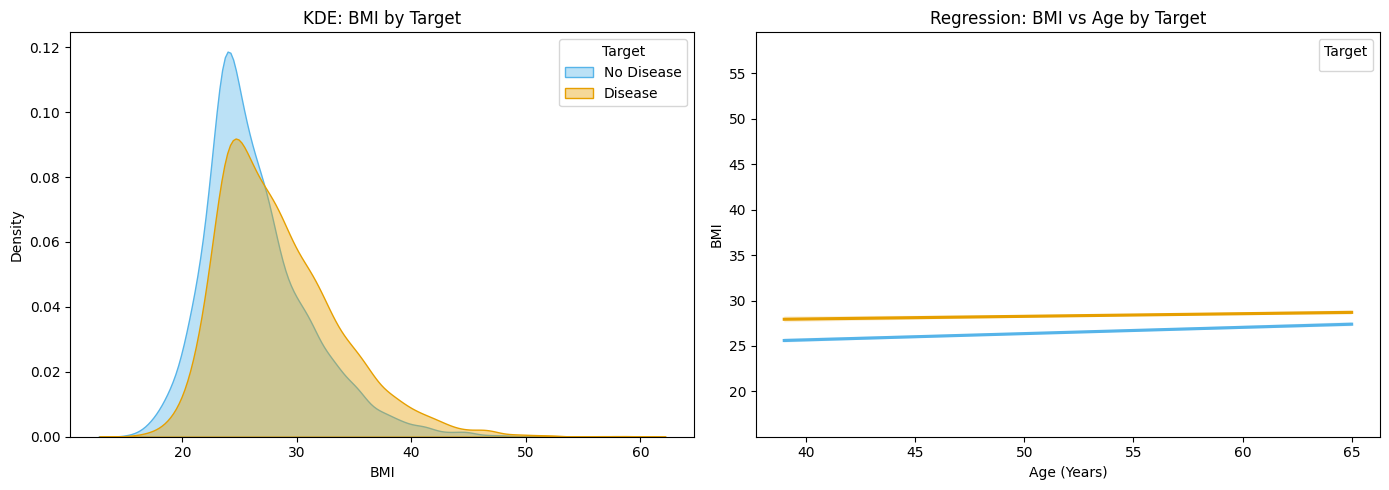

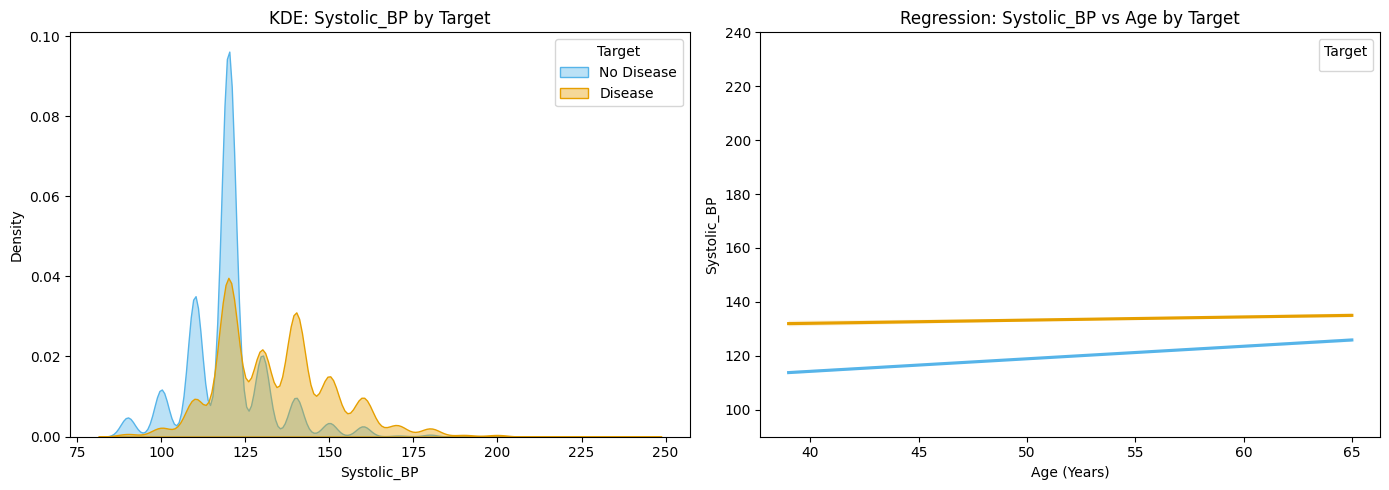

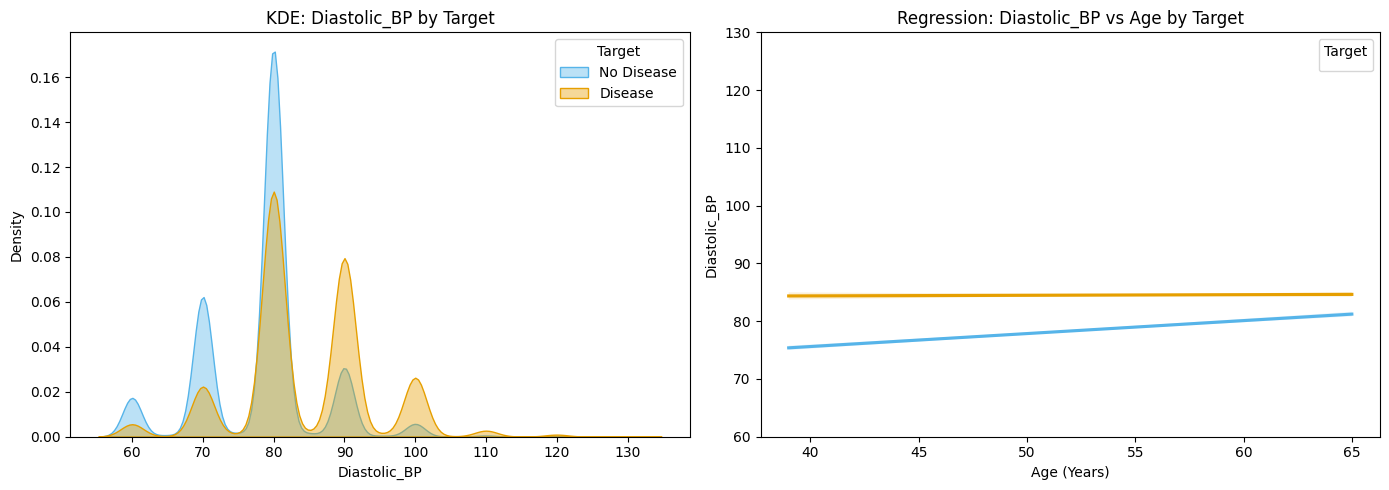

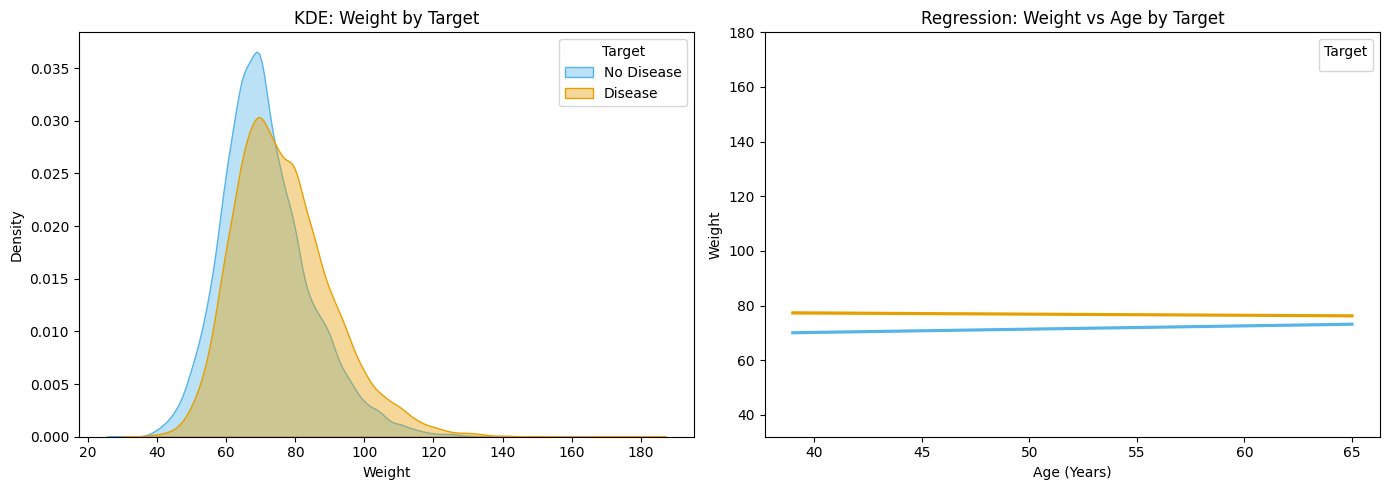

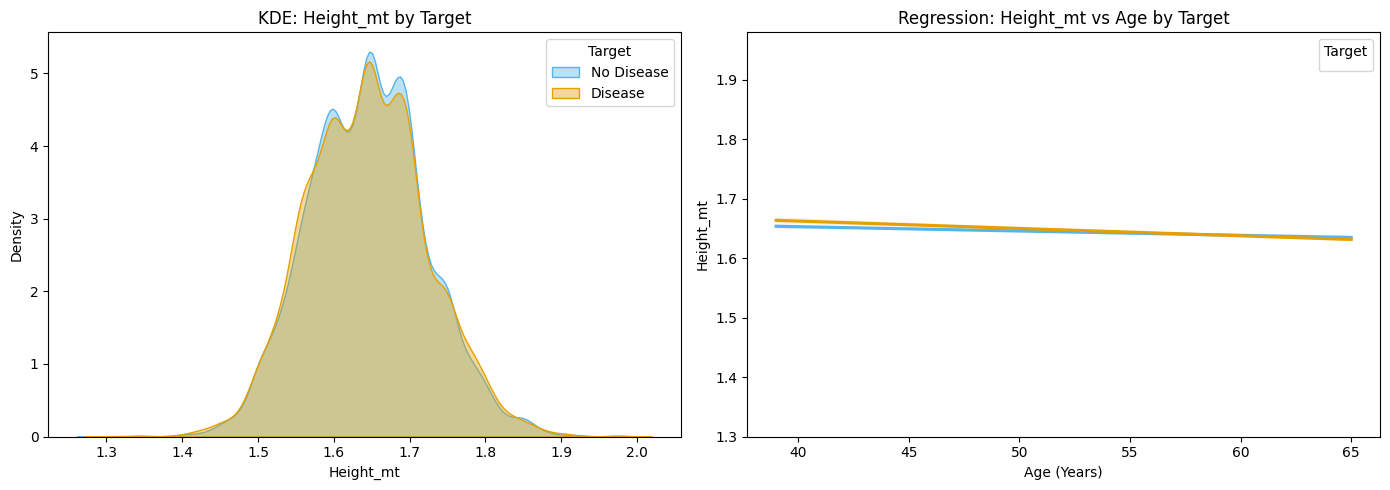

In [60]:
from sklearn.model_selection import train_test_split

# Define features
features = ['BMI', 'Systolic_BP', 'Diastolic_BP', 'Weight', 'Height_mt']

# Map target to names
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# --- Stratified sampling (~25% of dataset, max 15000 rows) ---
strata_size = min(15000, len(df))
df_sample, _ = train_test_split(
    df,
    train_size=strata_size,
    stratify=df['target'],
    random_state=42
)

# Plot KDE + Regression per feature
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Determine full y-range of the feature to match KDE and regression plots
    y_min = df_sample[feature].min()
    y_max = df_sample[feature].max()

    # --- Left: KDE of the feature per target (1D) ---
    for t_name, color in palette.items():
        sns.kdeplot(
            data=df_sample[df_sample['target_name']==t_name],
            x=feature,
            fill=True,
            alpha=0.4,
            color=color,
            label=t_name,
            common_norm=False,
            ax=axes[0]
        )
    axes[0].set_title(f"KDE: {feature} by Target")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend(title='Target')

    # --- Right: Regression of feature vs Age per target ---
    for t_name, color in palette.items():
        subset = df_sample[df_sample['target_name']==t_name]
        sns.regplot(
            data=subset,
            x='Age_Years',
            y=feature,
            scatter=False,
            line_kws={'color': color, 'label': t_name},
            ax=axes[1]
        )
    axes[1].set_title(f"Regression: {feature} vs Age by Target")
    axes[1].set_xlabel("Age (Years)")
    axes[1].set_ylabel(feature)
    axes[1].set_ylim(y_min, y_max)  # fix y-axis to match KDE
    axes[1].legend(title='Target')

    plt.tight_layout()
    plt.show()

conclusion:-
- In the diseased population, factors like high BMI and high weight are consistently present regardless of age. In the non-diseased population, these same risk factors (BMI, weight, BP) tend to increase as age increases

### categorical analysis

In [61]:
df.columns

Index(['id', 'Sex', 'Weight', 'Systolic_BP', 'Diastolic_BP',
       'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status',
       'Alcohol_Intake', 'Physical_Activity', 'target', 'Age_Years',
       'Height_mt', 'BMI', 'BP_level', 'Age_Group', 'BMI_Category',
       'target_name'],
      dtype='object')

In [62]:
cat_cols = ['Sex', 'BP_level', 'Age_Group', 'BMI_Category','Cholesterol_Level','Glucose_Level','Smoking_Status'
            ,'Alcohol_Intake','Physical_Activity']

In [63]:
# --- Logical Groups ---
groups = {
    'Demographics & Risk Factors': ['Sex', 'Age_Group', 'BMI_Category'],
    'Vitals & Biochemical': ['BP_level', 'Cholesterol_Level', 'Glucose_Level'],
    'Lifestyle Factors': ['Smoking_Status', 'Alcohol_Intake', 'Physical_Activity']
}

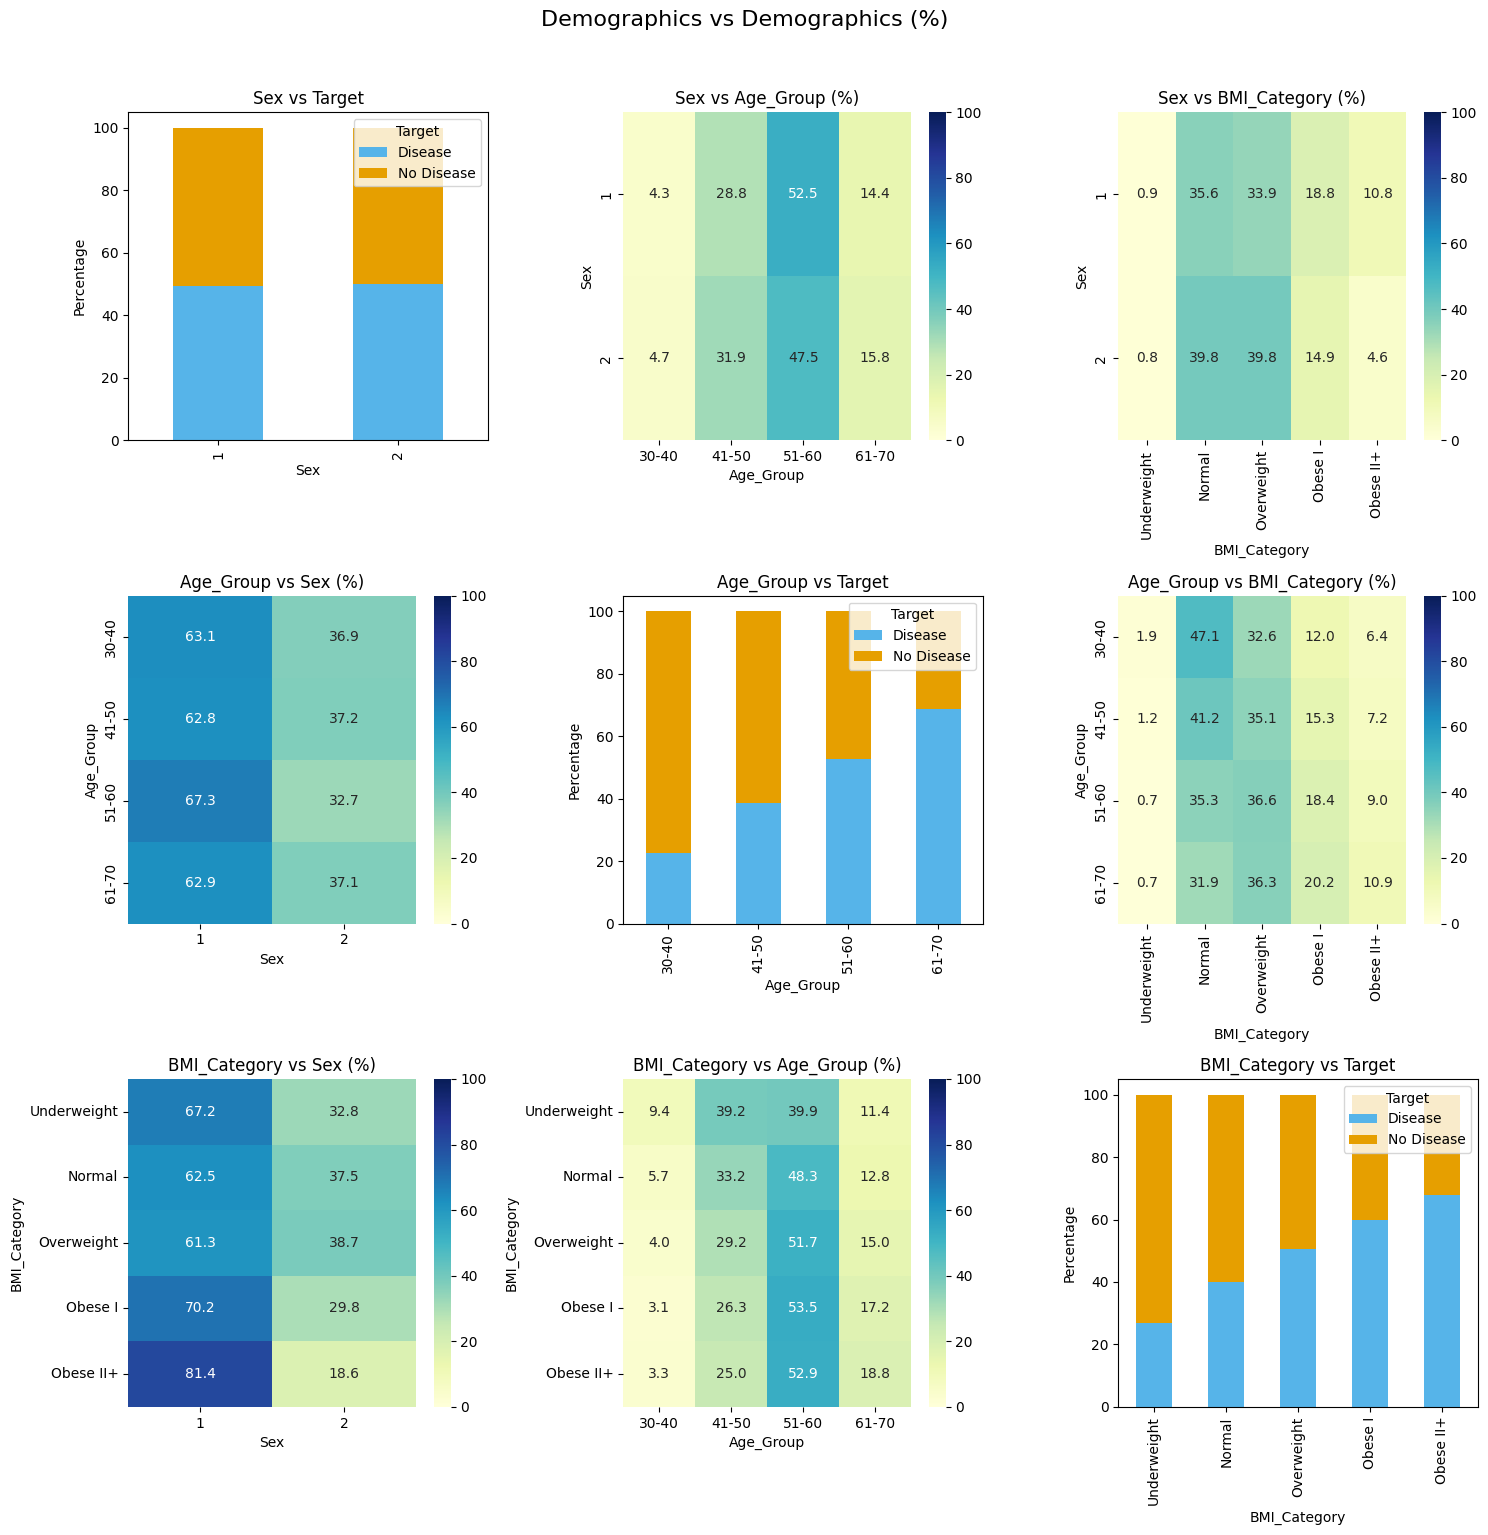

In [64]:
demo_cols = ['Sex', 'Age_Group', 'BMI_Category']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# Ensure target is mapped
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

#  Demo column vs Demo column (%) as heatmaps ---
n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Show target distribution as bar plot
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Show normalized heatmap of col1 vs col2
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")
plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

features are sex , age group , bmi 

-> sex vs rest
  - males are more weight than females (bmi) (twice of females but obese 2+ is 4 times of females)
  - males are more in number than females (age group) (twice of females)
  - equal in disease and no disease (no significant)

-> age group vs rest
 - as age increases bmi also increased
 - as age increase risk of developing disease also increases
 - more number males and females are in the age group 51-60 and next group is 41-50

-> bmi vs rest
 - as bmi increase risk of developing disease also increases
 - among different bmi catergories most males and females fall under the bmi range of normal to over weight and major age group is 30-50

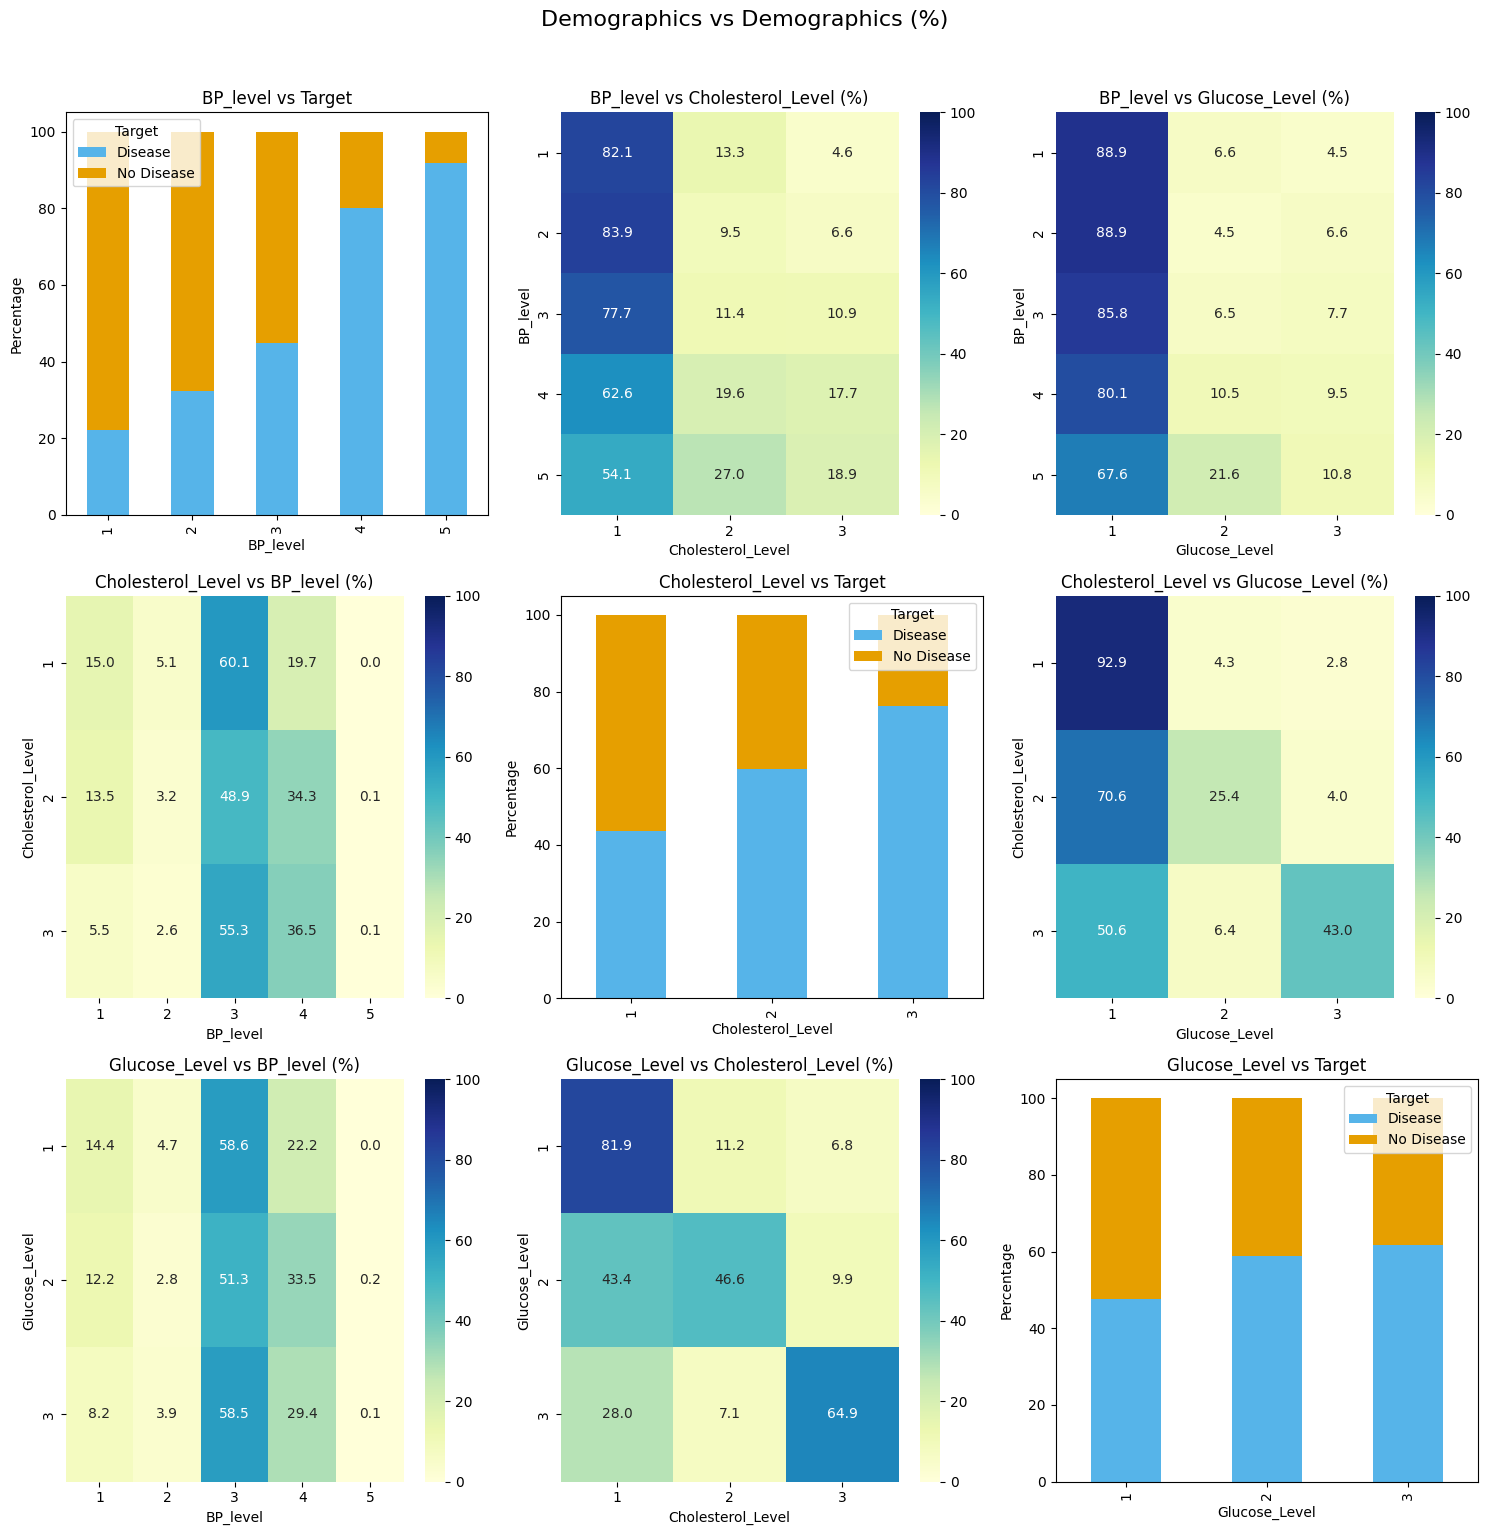

In [65]:
# Define ordered categories for BP
bp_order = [1,2,3,4,5]

# Convert BP_level to ordered categorical
df['BP_level'] = pd.Categorical(df['BP_level'], categories=bp_order, ordered=True)

# Same plotting code as yours
demo_cols = ['BP_level', 'Cholesterol_Level', 'Glucose_Level']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Target distribution for single demo col
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct = ct.reindex(bp_order) if col1 == "BP_level" else ct  # apply order only for BP_level
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Heatmap between two demo cols
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            if col1 == "BP_level":
                ct = ct.reindex(bp_order)   # reorder rows
            if col2 == "BP_level":
                ct = ct[ bp_order ]        # reorder columns
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")

plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

features - bp , cholesterol , glucose

-> bp vs rest
- as increase in glucose levels and cholesterol levels bp also increased and more percentage of males and females 
  are in hypertension stage 1
- as bp increses risk of developing disease also increases

-> cholesterol vs rest
- in chol 1 as sugar level increases the percentage of people are decreased and there shift from chol 2 
  as  chol values are increased sugar values are also increased
- in chol 1  the percentage of bp of  males and females are decreased and there shift from chol 2 
  as  chol values are increased bp values are also increased

-> glucose vs rest
- as glucose increase risk of developing disease also increases
- in glucose 1 as chol level increases the percentage of males and females are decreased and there shift from 
  glucose 2 as  glucose values are increases chol values are also increased
- in glucose 1 as bp level increases the percentage of males and females are decreased and there shift from 
  glucose 2 as  glucose values are increases bp values are also increased

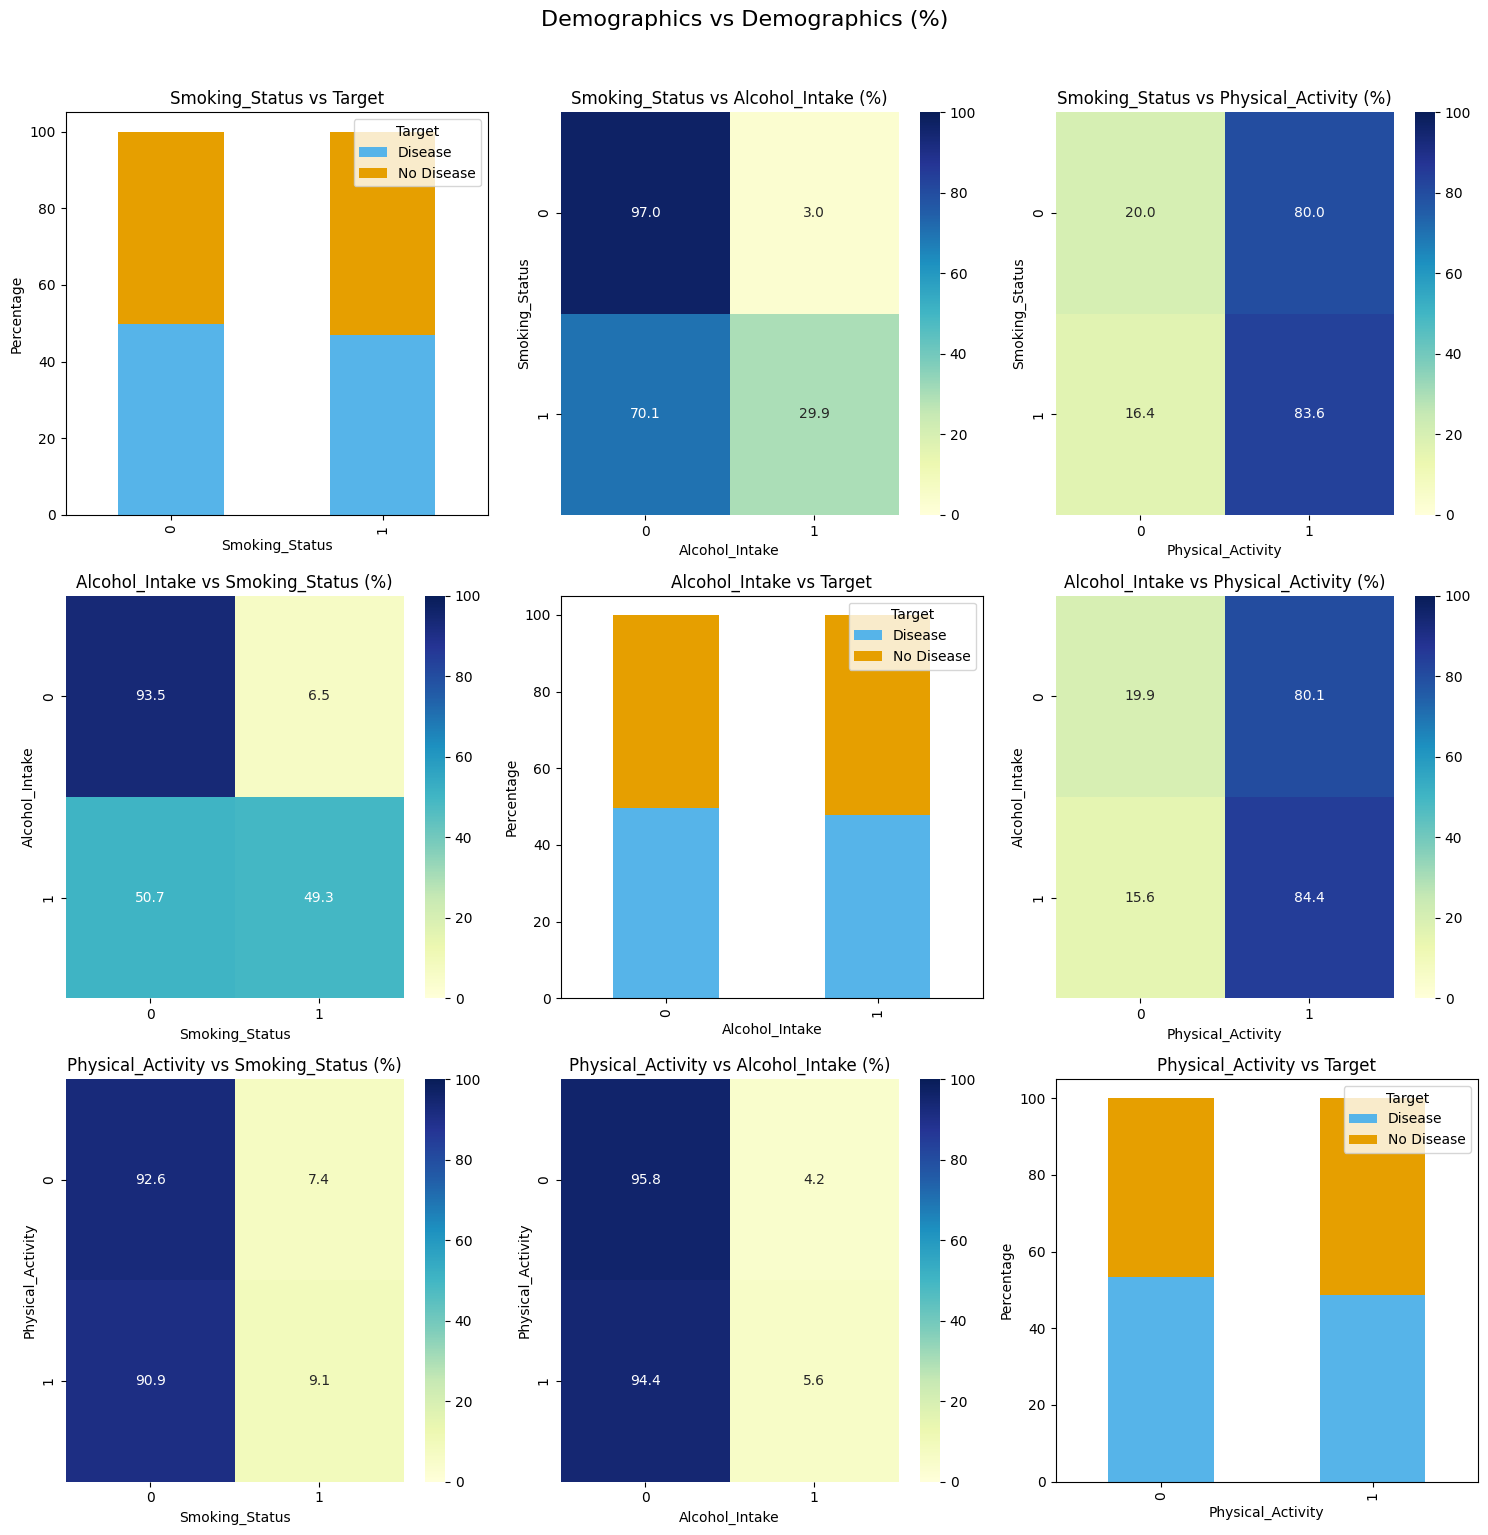

In [66]:
demo_cols = ['Smoking_Status', 'Alcohol_Intake', 'Physical_Activity']
palette = {'No Disease':'#56B4E9', 'Disease':'#E69F00'}

# Ensure target is mapped
df['target_name'] = df['target'].map({0:'No Disease', 1:'Disease'})

#  Demo column vs Demo column (%) as heatmaps ---
n = len(demo_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(demo_cols):
    for j, col2 in enumerate(demo_cols):
        ax = axes[i,j]
        if i==j:
            # Show target distribution as bar plot
            ct = pd.crosstab(df[col1], df['target_name'], normalize='index')*100
            ct.plot(kind='bar', stacked=True, color=[palette['No Disease'], palette['Disease']], ax=ax)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col1)
            ax.set_title(f"{col1} vs Target")
            ax.legend(title='Target')
        else:
            # Show normalized heatmap of col1 vs col2
            ct = pd.crosstab(df[col1], df[col2], normalize='index')*100
            sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax, vmin=0, vmax=100)
            ax.set_ylabel(col1)
            ax.set_xlabel(col2)
            ax.set_title(f"{col1} vs {col2} (%)")
plt.suptitle("Demographics vs Demographics (%)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

df=df.drop('target_name',axis=1)

observation :-
- there is huge difference in smoking status and alcohol intake . a person who smokes is 1o times more likely to consume alcohol also
- features vs target has similar or equal distribution none of it is the significant predictor of target

# multivariate analysis

In [67]:
# Create Pulse Pressure
df['Pulse_Pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

# Drop unwanted columns
df = df.drop(['Weight', 'Height_mt','Age_Group', 'BMI_Category','Systolic_BP', 'Diastolic_BP'], axis=1)

In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only original features
original_features = ["Sex","Cholesterol_Level","Glucose_Level","Smoking_Status",
                     "Alcohol_Intake","Physical_Activity","Age_Years","BMI",'Pulse_Pressure','BP_level']

# Ensure X is a DataFrame and add constant
X = sm.add_constant(df[original_features])
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=["const"] + original_features)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

              Feature       VIF
1                 Sex  1.161240
2   Cholesterol_Level  1.313512
3       Glucose_Level  1.258819
4      Smoking_Status  1.247170
5      Alcohol_Intake  1.138784
6   Physical_Activity  1.001477
7           Age_Years  1.072643
8                 BMI  1.108179
9      Pulse_Pressure  1.198676
10           BP_level  1.225329


Displaying the overall SHAP Summary Plot...


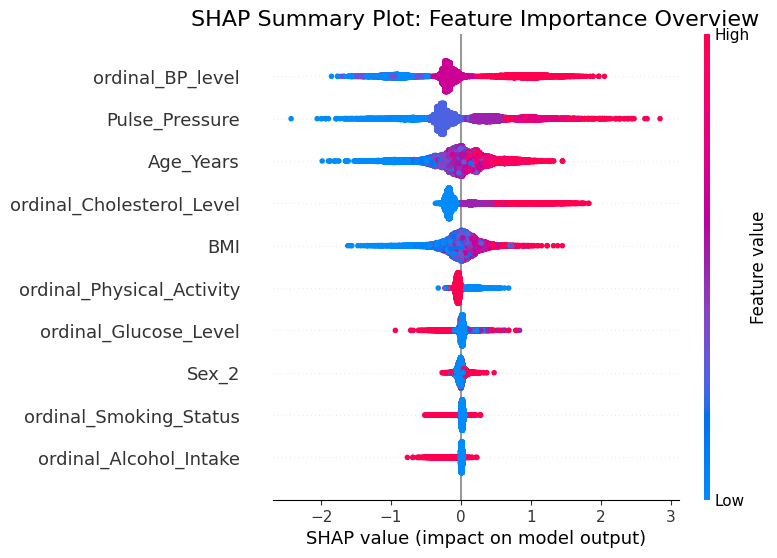


Displaying the SHAP Dependence Plot Grid for top features...


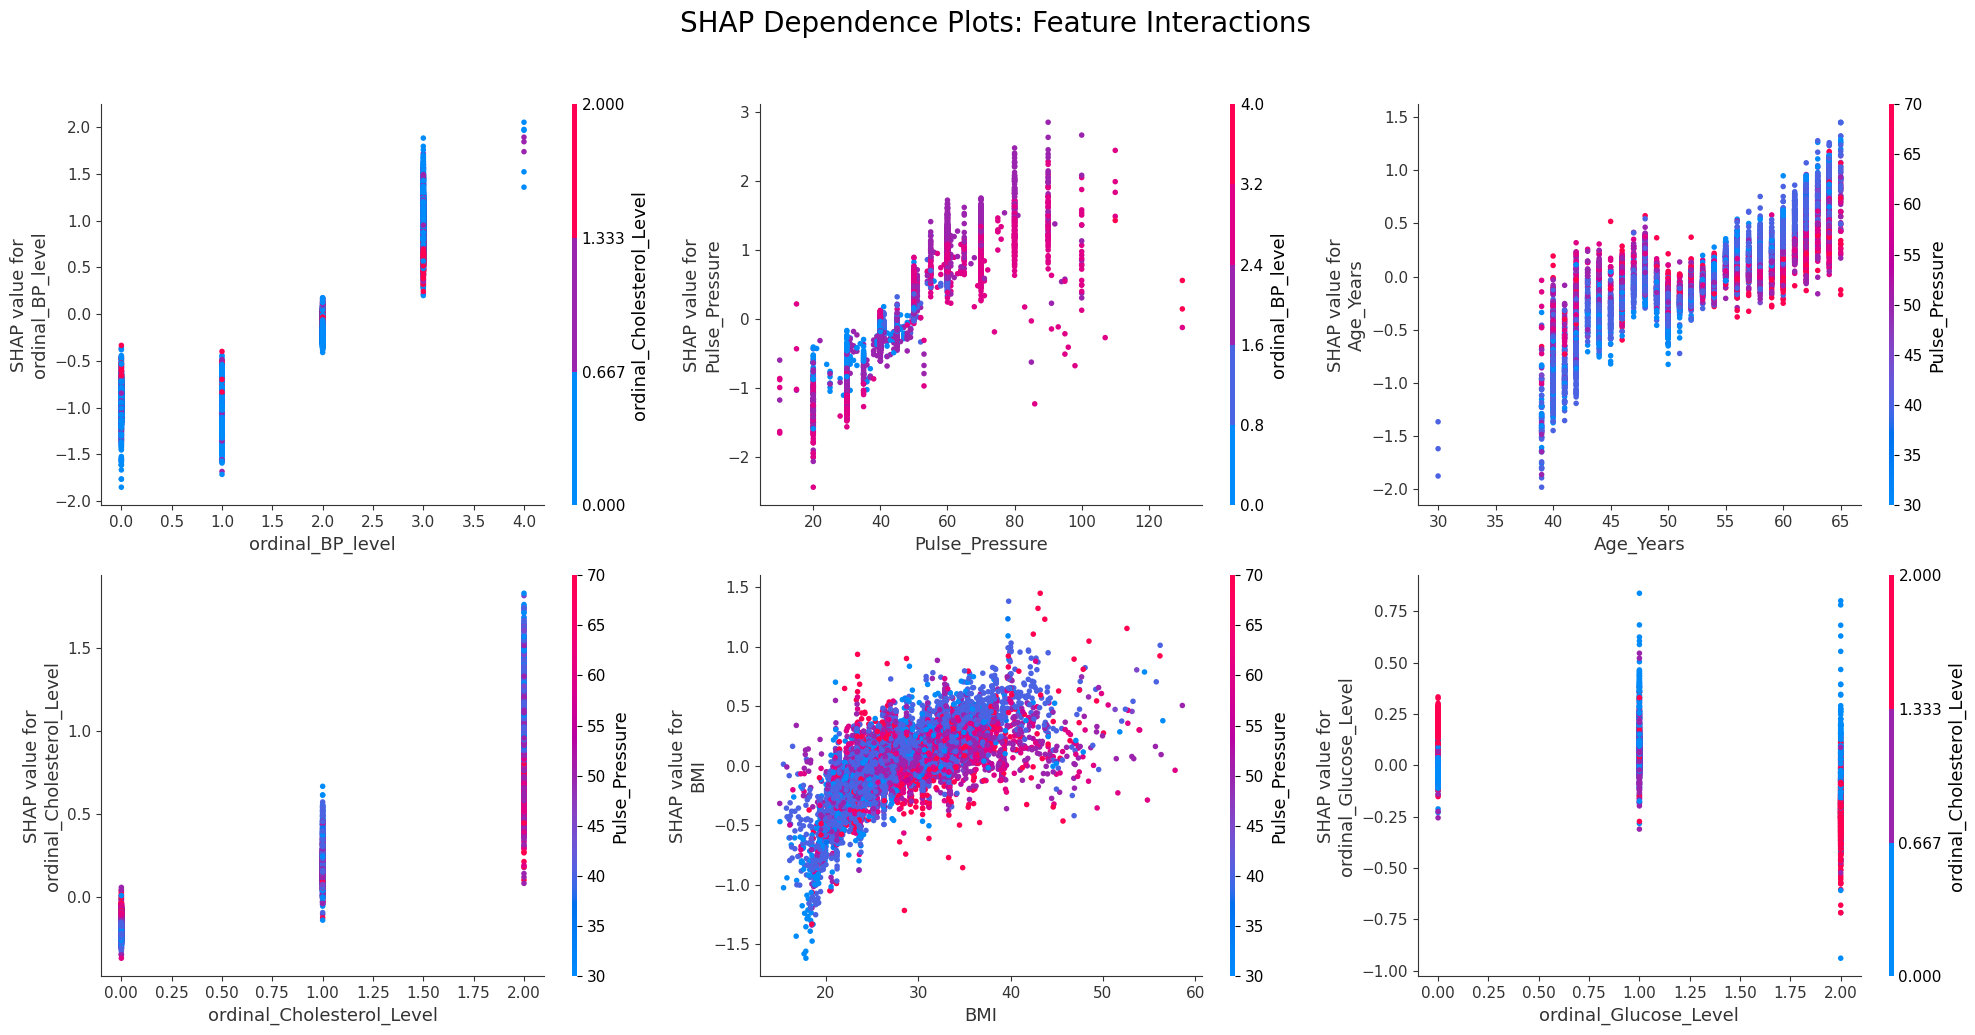

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap

# Assume 'df' is your pre-loaded and cleaned DataFrame

# ==================================================
# 1. Prepare modeling dataframe
# ==================================================
X_model = df.drop(["id", "target"], axis=1).copy()
y = df["target"].copy()

# ==================================================
# 2. Define feature types
# ==================================================
# Features with a natural order
true_ordinal_cols = [
    "Cholesterol_Level", 
    "Glucose_Level", 
    "Smoking_Status", 
    "Alcohol_Intake", 
    "Physical_Activity", 
    "BP_level"
]
# Features with no natural order
nominal_cols = ["Sex"]

# ==================================================
# 3. Apply OrdinalEncoder to true ordinal columns
# ==================================================
if true_ordinal_cols:
    encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X_model[true_ordinal_cols] = encoder.fit_transform(X_model[true_ordinal_cols])
    X_model.rename(
        columns={col: f"ordinal_{col}" for col in true_ordinal_cols},
        inplace=True
    )

# ==================================================
# 4. One-hot encode the nominal columns
# ==================================================
if nominal_cols:
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown="ignore")
    encoded_features = ohe.fit_transform(X_model[nominal_cols])
    encoded_df = pd.DataFrame(
        encoded_features, 
        columns=ohe.get_feature_names_out(nominal_cols),
        index=X_model.index
    )
    X_model = X_model.drop(nominal_cols, axis=1)
    X_model = pd.concat([X_model, encoded_df], axis=1)

# ==================================================
# 5. Train-test split
# ==================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, random_state=42, stratify=y
)

# ==================================================
# 6. Apply SMOTE to the training data ONLY
# ==================================================
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ==================================================
# 7. Train XGBoost model
# ==================================================
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train_res, y_train_res)

# ==================================================
# 8. Calculate SHAP values
# ==================================================
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# ==================================================
# 9. SHAP Summary Plot (The "Big Picture" Overview)
# ==================================================
print("Displaying the overall SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, show=False) # Use show=False to control when it's displayed
plt.title("SHAP Summary Plot: Feature Importance Overview", size=16)
plt.show()


# ==================================================
# 10. SHAP Dependence Plot Grid (The "Deep Dive" Analysis)
# ==================================================
print("\nDisplaying the SHAP Dependence Plot Grid for top features...")

# Define the list of key features for our deep dive
features_to_plot = [
    "ordinal_BP_level",
    "Pulse_Pressure",
    "Age_Years",
    "ordinal_Cholesterol_Level",
    "BMI",
    "ordinal_Glucose_Level"
]

# Create a matplotlib subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Loop through the features and axes to create each plot
for feature, ax in zip(features_to_plot, axes.flatten()):
    # Create the dependence plot on the specified subplot axis
    shap.dependence_plot(
        feature,
        shap_values,
        X_test,
        ax=ax,
        show=False
    )

# Finalize and show the plot grid
fig.suptitle("SHAP Dependence Plots: Feature Interactions", fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

### **Summary of Key Feature Interactions from SHAP dependence Plots**

These plots show how individual features impact the model's risk prediction for heart disease. A positive SHAP value (above 0) means higher risk, while a negative value (below 0) means a protective effect.

1.  **Blood Pressure Level:** This is the most powerful predictor. Low BP is strongly protective, while higher BP levels progressively increase the risk. This risk is slightly amplified in patients who also have high cholesterol.

2.  **Pulse Pressure:** High Pulse Pressure is a major risk factor. The model shows this risk is severely compounded in patients who also have a high overall Blood Pressure Level, making this combination particularly dangerous.

3.  **Age:** Age acts as a protective factor for younger individuals (below ~52) but becomes a significant risk factor for older individuals. The risk associated with aging is even greater for those who also have high Pulse Pressure.

4.  **Cholesterol Level:** Higher Cholesterol generally increases risk, but its effect is not as direct as blood pressure. The wide spread of the data points indicates that cholesterol's actual impact is highly variable and depends heavily on other health factors.

5.  **BMI:** Higher BMI is a clear risk factor. However, its impact is strongly interactive; the risk associated with a high BMI is significantly amplified in patients who also have high Pulse Pressure.

6.  **Glucose Level:** Higher Glucose levels are associated with higher risk. The model also found a complex interaction: for patients with the highest glucose levels, a medium cholesterol level was identified as slightly more risky than the highest cholesterol level, a nuanced finding that may require further investigation.

In [70]:
from pathlib import Path

# Your DataFrame 'df' is ready after EDA and cleaning...

# --- Correct way to save the processed data ---

# Define the correct directory path for processed data
# Path.cwd() is now our project root, so this is simple and reliable.
processed_dir = Path.cwd() / "data" / "processed data"

# Create the directory if it doesn't already exist
processed_dir.mkdir(parents=True, exist_ok=True)

# Define the full file path
processed_filepath = processed_dir / "processed_heart_disease.csv"

# Save the DataFrame to the correct location
df.to_csv(processed_filepath, index=False)

print(f"File saved successfully to: {processed_filepath}")

File saved successfully to: c:\Users\91833\end to end projects\diabetes prediction\src\notebooks\data\processed data\processed_heart_disease.csv
